In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Gradient Descent Implementation

In [10]:
def gradient_descent(x, y, lr, eps):
    # for visualization purpose
    tracking_data = [[], []]
    
    # initialize a and b
    a, b = 0, 0
    
    while True:
        dLda, dLdb = get_dLda(a, b, x, y), get_dLdb(a, b, x, y)
        
        a = a - lr*dLda
        b = b - lr*dLdb
        
        # for visualization purpose
        tracking_data[0].append(a)
        tracking_data[1].append(b)
    
        if magnitude(dLda, dLdb) < eps:
            break
    
    return a, b, tracking_data

def get_dLda(a, b, x, y):
    sum_ = np.sum(x*y) - a*np.sum(x**2) - b*np.sum(x)
    
    return -sum_/len(x)

def get_dLdb(a, b, x, y):
    sum_ = np.sum(y) - a*np.sum(x) - b*len(x)
    
    return -2*sum_/len(x)

def magnitude(dLda, dLdb):
    return np.sqrt(dLda**2+dLdb**2)

## Creating a model for diabetes prediction using the implementation

In [44]:
df_diabetes = pd.read_csv("diabetes.csv")

# select feature and lebal
y = df_diabetes["diabetes_progression"].to_numpy()
x = df_diabetes["s5"].to_numpy()

# create model
a, b, tracking_data = gradient_descent(x, y, 0.001, 0.01)

## Visualization of Gradient Descent

In [12]:
def slr_loss(a, b, x, y):
    
    main = (y - np.multiply.outer(a, np.squeeze(x)) - np.reshape(b, b.shape+(1,)))**2
    sum_ = np.sum(main, axis=len(main.shape)-1)
    return sum_/len(x)

Text(0.5, 0, 'L(a, b) - loss function')

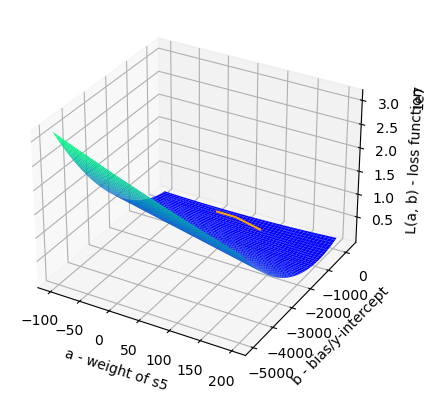

In [46]:
a_range, b_range = np.meshgrid(np.linspace(-100, 200, 500), np.linspace(-5000, 200, 200))
z = slr_loss(a_range, b_range, x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', computed_zorder=False)
ax.plot3D(tracking_data[0], tracking_data[1], slr_loss(np.array(tracking_data[0]), np.array(tracking_data[1]), x, y), color="orange", zorder=2)
ax.plot_surface(a_range, b_range, z, cmap='winter', zorder=1)
ax.set_xlabel("a - weight of s5")
ax.set_ylabel("b - bias/y-intercept")
ax.set_zlabel("L(a, b) - loss function")

# ax.view_init(elev=0., azim=30)